# Supervised Learning
The data given is labeled data here we have independent variables and target variable. Using supervised technique to train our model as well perform some tasks like:

    1. Primary Analysis of data
    2. EDA, missing values analysis, label encoding, feature scaling by scikit-learn
    3. Build few supervised models like Logistic Reg, AdaBoost, KNN, SVM.
    4. At end tabulate performance metrics of all models to see model performance in predicting target variable.

#### Importing Required Libraries for basic operations


1. **pandas:** With the help of pandas library operation of dataframe become easy, we can see all statistical parameters and also helps to perform many dataframe operations like rename column, concatinate, information of columns type, we can check for null values also, convert categorical to numerical, and many more.


2. **numpy:** numpy is used for basic array operations.


3. **Matplotlib & Seaborn:** Throughout the work I need visual representation of some columns, here matplotlib and seaborn will help to show graphical presentation of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1. Primary analysis of several categorical features reveal

(array([33950.,     0.,     0.,     0.,     0.,  6248.,     0.,     0.,
            0.,   990.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

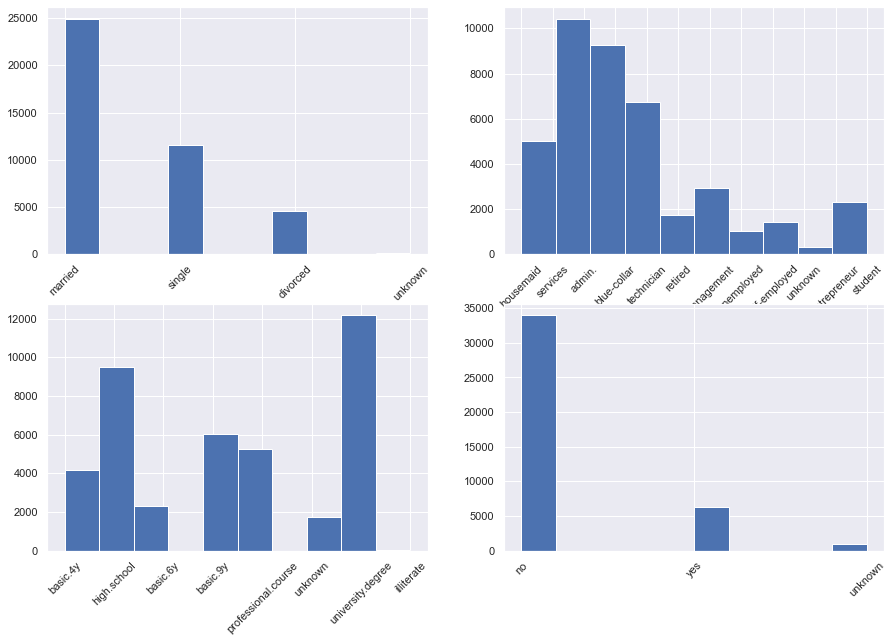

In [7]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
plt.xticks(rotation=45)
ax2 = fig.add_subplot(2,2,2)
plt.xticks(rotation=45)
ax3 = fig.add_subplot(2,2,3)
plt.xticks(rotation=45)
ax4 = fig.add_subplot(2,2,4)
plt.xticks(rotation=45)

ax1.hist(df.marital)

ax2.hist(df.job)

ax3.hist(df.education)

ax4.hist(df.loan)

In [8]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### 2. Basic Exploratory Data Analysis

In [44]:
df.shape

(41188, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Binarizing target column with help of pandas replace function
df['y'].replace({'yes' : 1, 'no' : 0}, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


With all above analysis it is clear that the problem is supervised classification problems. In classification there are independent and dependent variables as mention earlier, we need to specify independent as 'X' and dependent or target as 'y'.

In [10]:
# Storing independent variables in 'X' variable
X = df.iloc[:, :-1]

# Storing dependent variable in 'y' variable
y = df.iloc[:, -1]

In our dataset there are few categorical columns and one of Machine Learning requirement is all columns should have numerical data.

There are various ways to convert categorical columns into numerical such as:
    a. LabelEncoder
    b. OneHotEncoding
    c. PandasDummify
    
Here I am using basic dummifying technique to convert all categorical to numerical.

In [11]:
# Dummifying all categorical variables
categorical = df.describe(include='object').T.index.tolist()
X = pd.get_dummies(X, columns=categorical, drop_first=True)

### To check dataset is balance or not?
So far our whole dataset columns are numerical and now next step we need to check our target variable is distributed uniformly or it is imbalance.

**Imbalance:** Suppose we have 2 categories in our target variable and ration of them is 1000:10 which is totally imbalance

Let's check our target variable

In [12]:
from collections import Counter
Counter(y)

Counter({0: 36548, 1: 4640})

Majority class 0 number of entries 36548
Minority class 1 number of entries 4640
This is imbalance dataset, we are about this by seeing above distribution of majority and minority class

In next step I am going to check the percentage of majority class

In [13]:
pd.value_counts(y).head(1)/len(y)

0    0.887346
Name: y, dtype: float64

Here we can see that this is imbalanced dataset, to manage imbalance I am using technique to reduce the amount of imbalance by using hybrid technique of Imblearn.

In [14]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy=0.4,random_state=42)

In [15]:
X_new,y_new = smt.fit_resample(X, y)

In [16]:
Counter(y_new)

Counter({0: 36086, 1: 14157})

In [17]:
pd.value_counts(y_new).head(1)/len(y_new)

0    0.718229
Name: y, dtype: float64

In the above cell we can see that our perentage of imbalace reduce from 88.7 to 71.7 which is quite understandable for model to learn.

### Splitting datasets in test and train

After processing imbalance our dataset is ready for model training, but after training our model on the whole dataset how would we know the permormance of our model (which model is performing better and at what accuracy). To counter this question we can do split of our dataset into two parts one is trains_set and other is test_set.

Train_set is the data which is used to train our models and now we have test_set to check the performance of our model respectively.
This is the need of splitting our dataset into two parts train and test.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

Great!
we have train set and test set.
Now we are ready to build models?

No wait as far I know distance based algorithm need to scale whereas tree based algorithm is not necessarily need to scaled. And we are using both distance based and tree based algorithm as mentioned in earlier.

If we don't scale then it affect on distance based algorithm. This approach is not advisable.
Second approach is to scale and tree based algorithm perform well on scaled data also. So I will scale our dataset as discussed the reason being.

During my study I learn there are two methods to scale:

    1. Standardization
    2. Normalization
    
Eather method is suitable there is no set rule, Normally I use standardize method on ML and Normalization on Image dataset. (**NOTE:** No set rule, my personal way to have hands-on both techniques)

I will use scikit-learn StandardScaler function for scaling.

In [19]:
# Standarzing data by scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In above cell you might observe that on training I use `sc.fit_transform(X_train)` and `sc.transform(X_test)`

The logic here is simple we want to keep our test set unbias, `sc.transform` just transform the test set, all numerical calculation of train set like standard deviation is hidden to test set so when we do predict our model on test set it should not be biased other wise it will lead to overfitting. 

### 3. Applying supervised Model

In [20]:
# Calling models from frameworks:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
# Using variables to identifying model
lr= LogisticRegression()
adb = AdaBoostClassifier()
knn=KNeighborsClassifier()
svc = SVC()

In [26]:
# Fitting model on train set
lr.fit(X_train,y_train)
adb.fit(X_train,y_train)
knn.fit(X_train,y_train)
svc.fit(X_train,y_train)

SVC()

### 4. Model Performance

With the model whatever is been used we need to check the performance of each model to identify the performance, and to take a call to choose the best fit model.

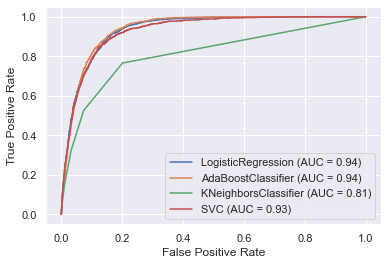

In [27]:
from sklearn.metrics import plot_roc_curve
roc=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(adb,X_test,y_test,ax=roc.ax_);
plot_roc_curve(knn,X_test,y_test,ax=roc.ax_);
plot_roc_curve(svc,X_test,y_test,ax=roc.ax_);

Above graph shows performance of each model, Logistic Regression and AdaBoost Classifier is scoring 94% it is not accuracy it is (AUC score).

In [29]:
# Predicting models on test data
lr_y_pred = lr.predict(X_test)
adb_y_pred = adb.predict(X_test)
knn_y_pred = knn.predict(X_test)
svc_y_pred = svc.predict(X_test)

Now I have so far build 4 models and have been through AUC score also. Being datascientist we can make our decision based on one performance we need to check various things.

Let's see model performance in term of accuracy of each.

In [30]:
from sklearn.metrics import accuracy_score

print(f"Logistic Reg ACC  : {accuracy_score(y_test, lr_y_pred)*100}")
print(f"ADABoost Tree ACC : {accuracy_score(y_test, adb_y_pred)*100}")
print(f"KNN ACC           : {accuracy_score(y_test, knn_y_pred)*100}")
print(f"SVC ACC           : {accuracy_score(y_test, svc_y_pred)*100}")

Logistic Reg ACC  : 91.05421908335173
ADABoost Tree ACC : 90.75259324652394
KNN ACC           : 89.50194953284779
SVC ACC           : 90.811447068344


**Logistic Reg:**
    -AUC SCORE : 0.94
    -ACCURACY  : 0.91
    
**ADABoost:**
    -AUC SCORE : 0.94
    -ACCURACY  : 0.90
    
**KNN:**
    -AUC SCORE : 0.81
    -ACCURACY  : 0.89
    
**SVM:**
    -AUC SCORE : 0.93
    -ACCURACY  : 0.90

Till now I can say Logistic Regression is performing well, but let's go one more step ahead and do confusion metrix evaluation.

Confusion metrix will tell beyond accuracy, we can identify the amount of misclassified prediction by false positive and false negative also correctly classified of True positive and true negative.

#### Short Intro about True Positive, False Positive, True Negative, False Negative

    -True positive  : 1 is truly predicted as 1 by our model
    -True negative  : 0 is correctly classified as 0 by model
    -False positive : 0 is misclassified as 1
    -False negative : 1 is misclassified as 0

Now we have adequate understanding of confusion metrix. Let's do it manually.

In [40]:
# Confusion Metrix for Logistic Reg
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,lr_y_pred)
cm_lr

##True Negative
TN_lr=cm_lr[0,0]
##False Negative
FN_lr=cm_lr[1,0]
##False Positives
FP_lr=cm_lr[0,1]
##True Positives
TP_lr=cm_lr[1,1]

## Calculating Sensitivity
Sensitivity=TP_lr/(TP_lr+FN_lr)

##Calculating Specificity
Specificity=TN_lr/(TN_lr+FP_lr)

##Precision
Precision= TP_lr/(TP_lr+FP_lr)

print(f'Specificity : {Specificity}')
print(f'Precision   : {Precision}')
print(f'Sensitivity : {Sensitivity}')

Specificity : 0.9737889847378899
Precision   : 0.6684155299055614
Sensitivity : 0.41444372153545866


In [39]:
# Confusion Metrix for ADA Boost
from sklearn.metrics import confusion_matrix
cm_adb=confusion_matrix(y_test,adb_y_pred)

##True Negative
TN_adb=cm_adb[0,0]
##False Negative
FN_adb=cm_adb[1,0]
##False Positives
FP_adb=cm_adb[0,1]
##True Positives
TP_adb=cm_adb[1,1]

## Calculating Sensitivity
Sensitivity=TP_adb/(TP_adb+FN_adb)

##Calculating Specificity
Specificity=TN_adb/(TN_adb+FP_adb)

##Precision
Precision= TP_adb/(TP_adb+FP_adb)

print(f'Specificity : {Specificity}')
print(f'Precision   : {Precision}')
print(f'Sensitivity : {Sensitivity}')

Specificity : 0.9725447909754479
Precision   : 0.648619957537155
Sensitivity : 0.39752765126870526


In [42]:
# Confusion Metrix for KNN
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,knn_y_pred)
cm_knn

##True Negative
TN_knn=cm_knn[0,0]
##False Negative
FN_knn=cm_knn[1,0]
##False Positives
FP_knn=cm_knn[0,1]
##True Positives
TP_knn=cm_knn[1,1]

## Calculating Sensitivity
Sensitivity=TP_knn/(TP_knn+FN_knn)

##Calculating Specificity
Specificity=TN_knn/(TN_knn+FP_knn)

##Precision
Precision= TP_knn/(TP_knn+FP_knn)

print(f'Specificity : {Specificity}')
print(f'Precision   : {Precision}')
print(f'Sensitivity : {Sensitivity}')

Specificity : 0.968065693430657
Precision   : 0.5625
Sensitivity : 0.32205595315549773


In [43]:
# Confusion Metrix for SVC
from sklearn.metrics import confusion_matrix
cm_svc=confusion_matrix(y_test,svc_y_pred)
cm_svc

##True Negative
TN_svc=cm_svc[0,0]
##False Negative
FN_svc=cm_svc[1,0]
##False Positives
FP_svc=cm_svc[0,1]
##True Positives
TP_svc=cm_svc[1,1]

## Calculating Sensitivity
Sensitivity=TP_svc/(TP_svc+FN_svc)

##Calculating Specificity
Specificity=TN_svc/(TN_svc+FP_svc)

##Precision
Precision= TP_svc/(TP_svc+FP_svc)

print(f'Specificity : {Specificity}')
print(f'Precision   : {Precision}')
print(f'Sensitivity : {Sensitivity}')

Specificity : 0.9769409422694094
Precision   : 0.6706161137440758
Sensitivity : 0.3682498373454782


### Conclusion

#### Model Performance

**Logistic Regression:**

    -Accuracy    : 0.91
    -Specificity : 0.97
    -Precision   : 0.67
    -Sensitivity : 0.41
    -ROC Score   : 0.94

**ADA Boost:**

    -Accuracy    : 0.90
    -Specificity : 0.97
    -Precision   : 0.65
    -Sensitivity : 0.40
    -ROC Score   : 0.94

**K Nearest Neighbour:**

    -Accuracy    : 0.89
    -Specificity : 0.97
    -Precision   : 0.56
    -Sensitivity : 0.32
    -ROC Score   : 0.81

**Support Vector Classifier:**

    -Accuracy    : 0.90
    -Specificity : 0.98
    -Precision   : 0.67
    -Sensitivity : 0.37
    -ROC Score   : 0.93

After all the model evaluation Logistic Regression is performing well as compared to other applied model. As we can see with Logistic Regression our Accuracy, Specificity, Sensitivity, and Precision giving satisfied outcome.

For current dataset I must go with Logistic Regression and if more data is generated then we should perform all analysis again to check model performance.

My suggestion is to go with Logistic Regression as per my Analysis.